In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi yükleyelim
# Dosya adının indirdiğin dosya ile aynı olduğundan emin ol
df = pd.read_csv("winequality-red.csv")

# İlk 5 satıra bakalım
# head() fonksiyonu verinin fragmanıdır.
print("Veri Setinin İlk 5 Satırı:")
display(df.head())

# Veri seti hakkında genel bilgi (Satır sayısı, veri tipleri, boş değer var mı?)
print("\nVeri Seti Bilgileri:")
print(df.info())

Veri Setinin İlk 5 Satırı:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Veri Seti Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


C:\Users\yigit\AppData\Local\Temp\ipykernel_21776\400605898.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=full_counts.index, y=full_counts.values, palette='viridis')


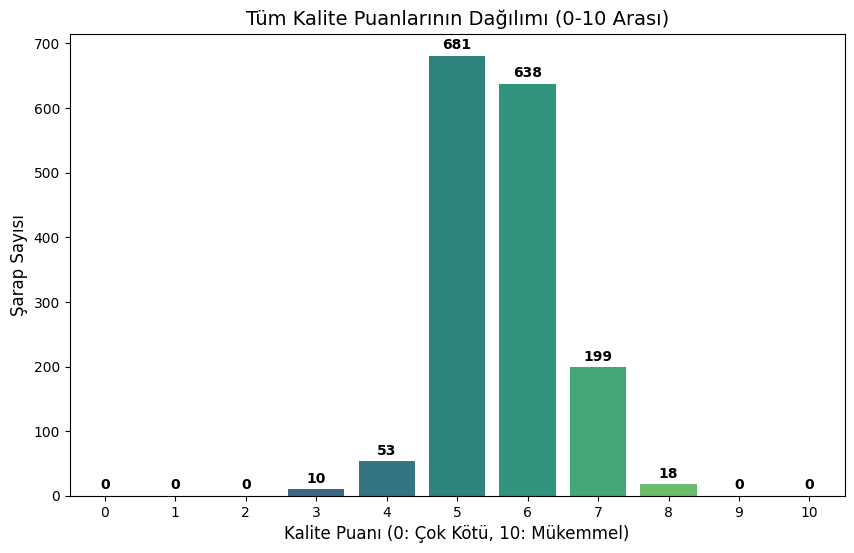

0-10 Arası Tüm Puanların Sayısı:
quality
0       0
1       0
2       0
3      10
4      53
5     681
6     638
7     199
8      18
9       0
10      0
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Mevcut puanları sayalım
actual_counts = df['quality'].value_counts()

# 2. 0'dan 10'a kadar teorik olarak olması gereken tüm puanları içeren bir indeks oluşturalım
full_range = range(0, 11)  # 0, 1, ..., 10

# 3. reindex ile eksik olan puanları ekleyip değerlerini 0 yapalım
full_counts = actual_counts.reindex(full_range, fill_value=0)

# Grafik çizimi
plt.figure(figsize=(10, 6))

# sns.barplot kullanıyoruz çünkü sayıları biz hazırladık
sns.barplot(x=full_counts.index, y=full_counts.values, palette='viridis')

plt.title("Tüm Kalite Puanlarının Dağılımı (0-10 Arası)", fontsize=14)
plt.xlabel("Kalite Puanı (0: Çok Kötü, 10: Mükemmel)", fontsize=12)
plt.ylabel("Şarap Sayısı", fontsize=12)

# Barların üzerine sayıları yazdıralım ki net görelim
for i, v in enumerate(full_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.show()

# Sayısal döküm
print("0-10 Arası Tüm Puanların Sayısı:")
print(full_counts)

Yeni Hedef Değişken Dağılımı:
good_quality
1    855
0    744
Name: count, dtype: int64


C:\Users\yigit\AppData\Local\Temp\ipykernel_21776\1461347568.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='good_quality', data=df, palette='coolwarm')


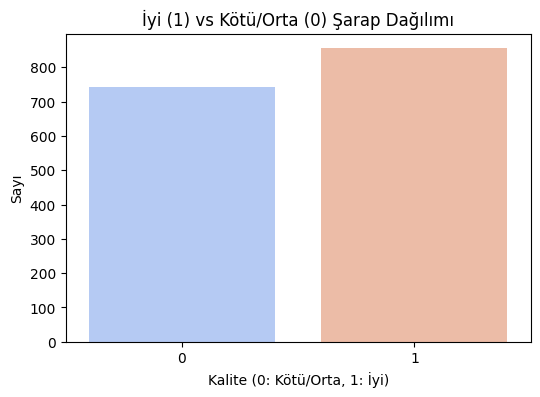

In [7]:
# Stratejimizi uyguluyoruz:
# Eğer kalite 5'ten büyükse (6,7,8) -> 1 (İyi)
# Değilse (3,4,5) -> 0 (Kötü/Orta)

df['good_quality'] = [1 if x > 5 else 0 for x in df['quality']]

# Şimdi yeni hedef değişkenimizin dağılımına bakalım
print("Yeni Hedef Değişken Dağılımı:")
print(df['good_quality'].value_counts())

# Görselleştirelim
plt.figure(figsize=(6, 4))
sns.countplot(x='good_quality', data=df, palette='coolwarm')
plt.title("İyi (1) vs Kötü/Orta (0) Şarap Dağılımı")
plt.xlabel("Kalite (0: Kötü/Orta, 1: İyi)")
plt.ylabel("Sayı")
plt.show()

# Eski 'quality' sütunuyla işimiz bitti mi?
# Hayır, ama model eğitirken onu kullanmayacağız çünkü cevabın kendisi o!
# Şimdilik dursun, eğitim aşamasında çıkaracağız.

Hedef Değişken (good_quality) ile Korelasyonlar:

good_quality            1.000000
alcohol                 0.434751
sulphates               0.218072
citric acid             0.159129
fixed acidity           0.095093
residual sugar         -0.002160
pH                     -0.003264
free sulfur dioxide    -0.061757
chlorides              -0.109494
density                -0.159110
total sulfur dioxide   -0.231963
volatile acidity       -0.321441
Name: good_quality, dtype: float64


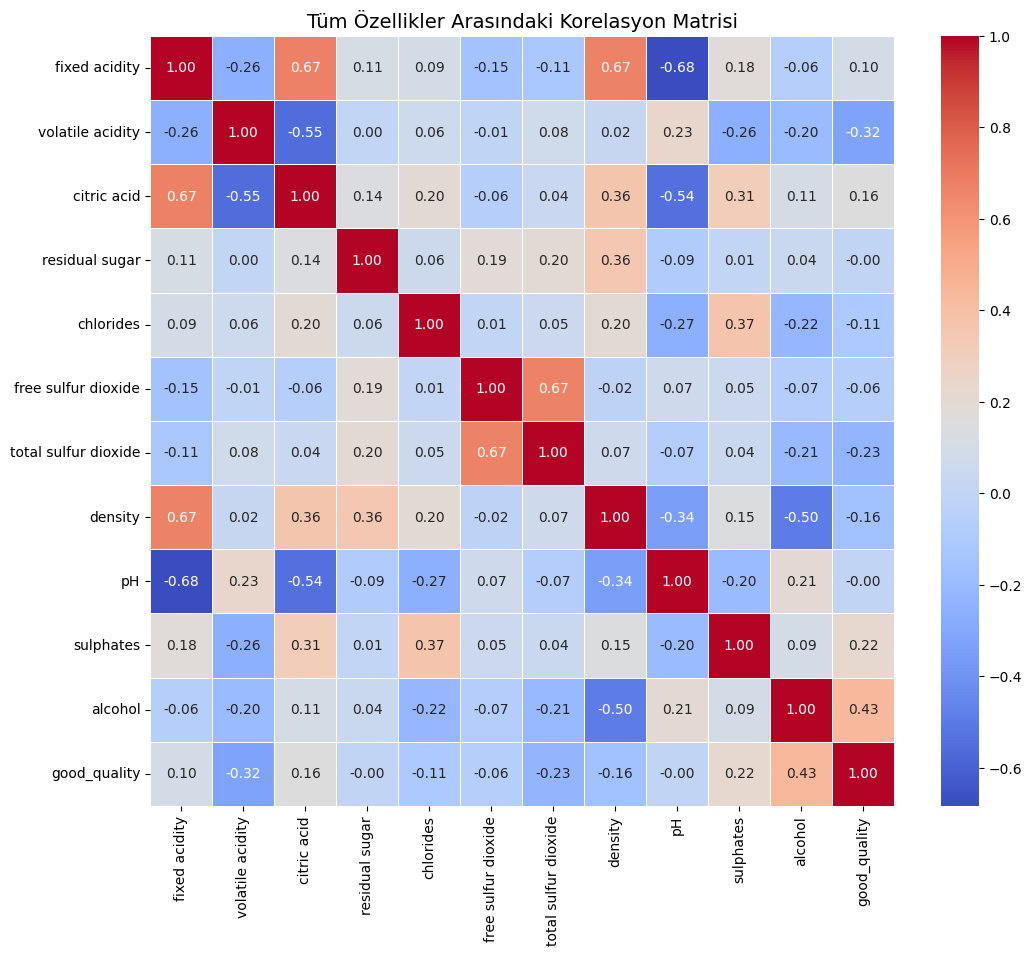

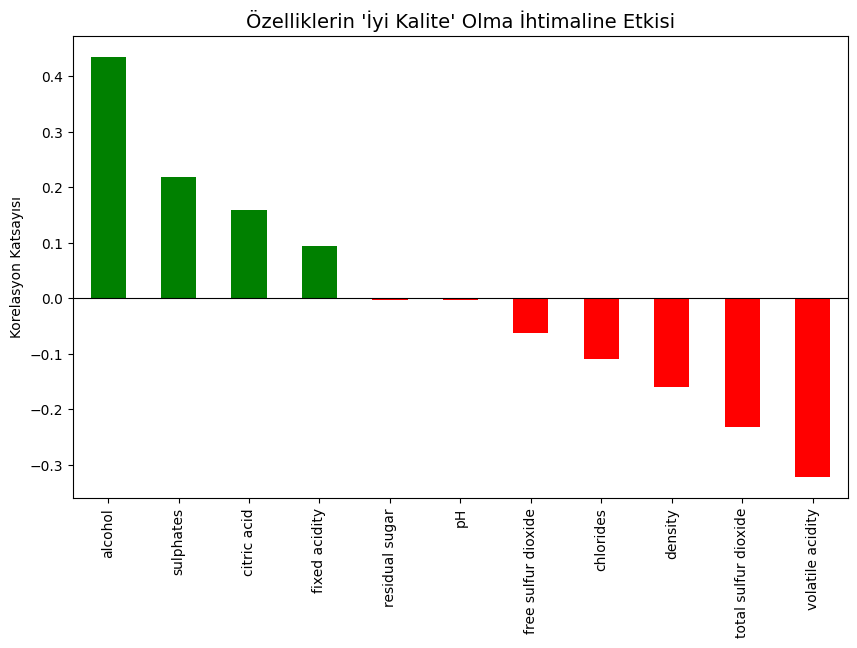

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eski 'quality' sütununu analizden çıkaralım çünkü 'good_quality' zaten ondan üretildi.
# Eğer çıkarmazsak %100'e yakın korelasyon çıkar, bu hile yapmak olur :)
correlation_data = df.drop('quality', axis=1)

# 1. Korelasyon Matrisini Hesapla
corr_matrix = correlation_data.corr()

# --- TERMİNAL ÇIKTISI ---
print("Hedef Değişken (good_quality) ile Korelasyonlar:\n")
# Sadece good_quality sütununu alıp sıralayalım
target_corr = corr_matrix['good_quality'].sort_values(ascending=False)
print(target_corr)

# --- GÖRSEL ÇIKTILAR ---

# Görsel 1: Büyük Heatmap (Tüm İlişkiler)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Tüm Özellikler Arasındaki Korelasyon Matrisi", fontsize=14)
plt.show()

# Görsel 2: Hedef Odaklı Çubuk Grafik (Daha Net Görünüm)
plt.figure(figsize=(10, 6))
# good_quality'nin kendisiyle ilişkisini (1.0) grafikten atalım ki diğerlerini görelim
target_corr.drop('good_quality').plot(kind='bar', color=['green' if x > 0 else 'red' for x in target_corr.drop('good_quality')])
plt.title("Özelliklerin 'İyi Kalite' Olma İhtimaline Etkisi", fontsize=14)
plt.ylabel("Korelasyon Katsayısı")
plt.axhline(0, color='black', linewidth=0.8) # 0 noktasına çizgi çekelim
plt.show()

C:\Users\yigit\AppData\Local\Temp\ipykernel_21776\989888464.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='good_quality', y=col, data=df, palette='Set2')
C:\Users\yigit\AppData\Local\Temp\ipykernel_21776\989888464.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='good_quality', y=col, data=df, palette='Set2')
C:\Users\yigit\AppData\Local\Temp\ipykernel_21776\989888464.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='good_quality', y=col, data=df, palette='Set2')


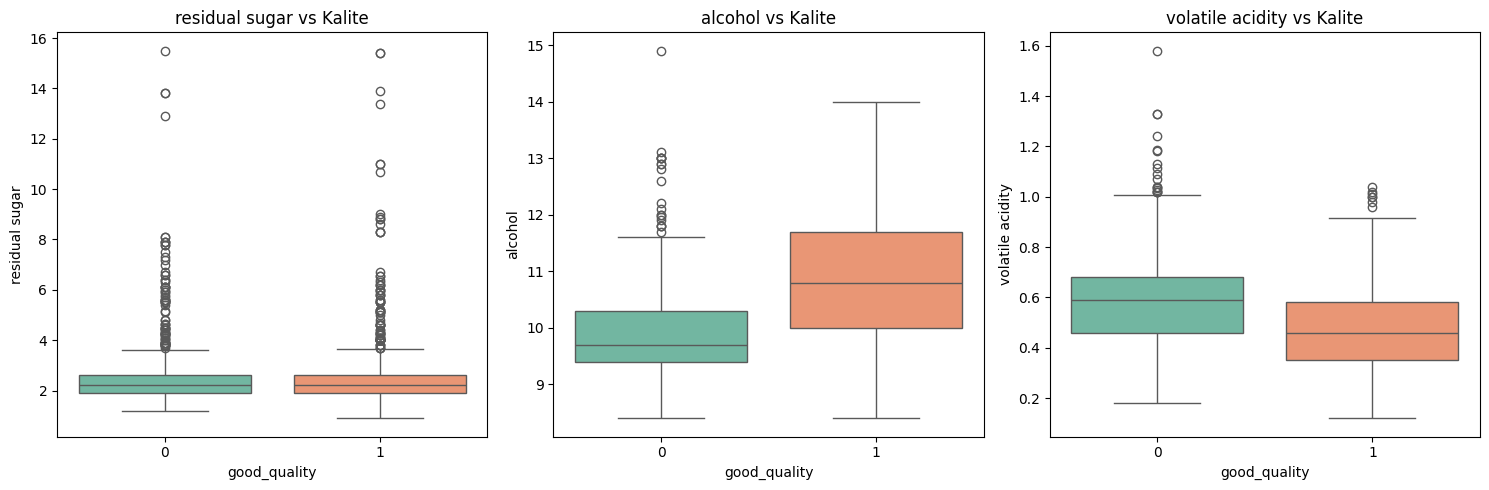

In [9]:
# Verimizdeki aykırı değerleri görmek için Boxplot çizelim
# Özellikle 'residual sugar' ve 'alcohol' sütunlarına odaklanalım

features_to_check = ['residual sugar', 'alcohol', 'volatile acidity']

plt.figure(figsize=(15, 5))

for i, col in enumerate(features_to_check):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='good_quality', y=col, data=df, palette='Set2')
    plt.title(f"{col} vs Kalite")

plt.tight_layout()
plt.show()

Orijinal Veri Sayısı: 1599
Temizlenmiş Veri Sayısı: 1194
Silinen Aykırı Veri Sayısı: 405
Veri Kaybı Oranı: %25.33


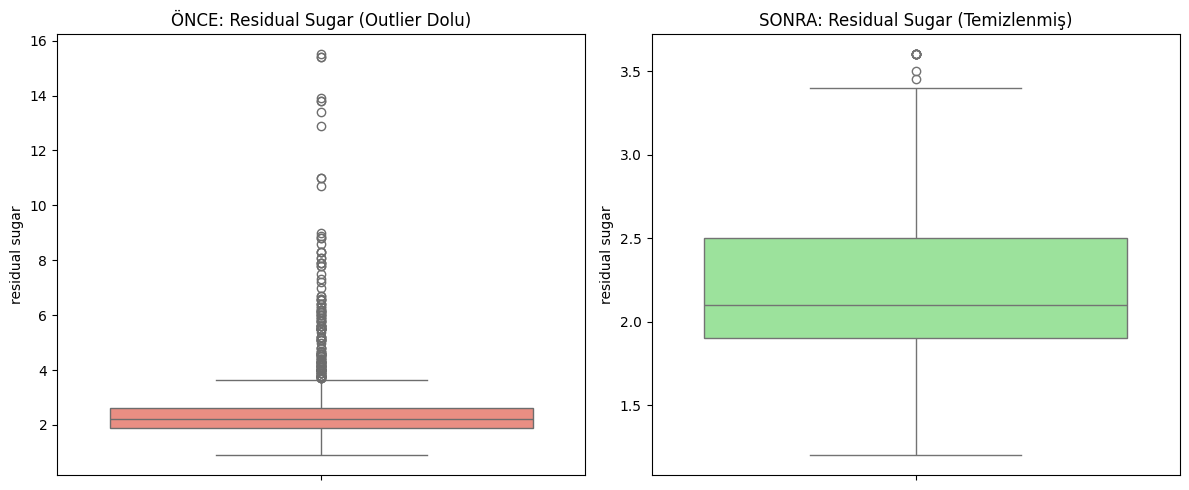

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # plt'yi doğru şekilde tanımlıyoruz

# 1. Veriyi tazeleyelim
df = pd.read_csv("winequality-red.csv")
# Hedef değişkeni tekrar oluşturalım
df['good_quality'] = [1 if x > 5 else 0 for x in df['quality']]

# 2. IQR Temizliği İçin Hazırlık
# Hedef değişkenleri (quality ve good_quality) temizlik dışı bırakıyoruz.
# Çünkü 'kalite 8' istatistiksel olarak uç değer olsa bile bizim için geçerli bir veridir, silmemeliyiz.
cols_to_clean = df.columns.drop(['quality', 'good_quality'])

Q1 = df[cols_to_clean].quantile(0.25)
Q3 = df[cols_to_clean].quantile(0.75)
IQR = Q3 - Q1

# Temizlik Kuralı: Alt sınırdan küçük VEYA üst sınırdan büyük olan SATIRLARI bul
# ~ işareti "bunların dışındakileri al" demektir.
condition = ~((df[cols_to_clean] < (Q1 - 1.5 * IQR)) | (df[cols_to_clean] > (Q3 + 1.5 * IQR))).any(axis=1)

df_clean = df[condition]

# 3. Sonuçları Yazdıralım
print(f"Orijinal Veri Sayısı: {len(df)}")
print(f"Temizlenmiş Veri Sayısı: {len(df_clean)}")
deleted_count = len(df) - len(df_clean)
print(f"Silinen Aykırı Veri Sayısı: {deleted_count}")
print(f"Veri Kaybı Oranı: %{deleted_count / len(df) * 100:.2f}")

# 4. Görsel Kontrol (Residual Sugar örneği üzerinden)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['residual sugar'], color='salmon') # y=df[...] diyerek net belirtiyoruz
plt.title("ÖNCE: Residual Sugar (Outlier Dolu)")

plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean['residual sugar'], color='lightgreen')
plt.title("SONRA: Residual Sugar (Temizlenmiş)")

plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Özellikler (X) ve Hedef (y) Ayrımı
# X: Sorular (Kimyasal özellikler)
# y: Cevaplar (İyi mi Kötü mü?)
X = df_clean.drop(['quality', 'good_quality'], axis=1)
y = df_clean['good_quality']

# 2. Eğitim ve Test Olarak Ayırma (%20 Test, %80 Eğitim)
# random_state=42: Her çalıştırdığımızda aynı şekilde bölsün diye (Kodun sonucu değişmesin).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Ölçeklendirme (Standard Scaling)
scaler = StandardScaler()

# ÇOK ÖNEMLİ KURAL:
# Scaler'ı sadece Eğitim (Train) setine göre ayarlıyoruz (fit).
# Sonra hem eğitimi hem testi o ayarlara göre dönüştürüyoruz (transform).
# Neden? Çünkü gerçek hayatta test verisini (geleceği) önceden bilip ortalamasını alamayız.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Hazırlık Tamam!")
print(f"Modelin Eğitileceği Veri Sayısı (Train): {X_train_scaled.shape[0]}")
print(f"Modelin Test Edileceği Veri Sayısı (Test): {X_test_scaled.shape[0]}")

Hazırlık Tamam!
Modelin Eğitileceği Veri Sayısı (Train): 955
Modelin Test Edileceği Veri Sayısı (Test): 239


Model eğitiliyor...

Model Başarısı (Accuracy): %79.08


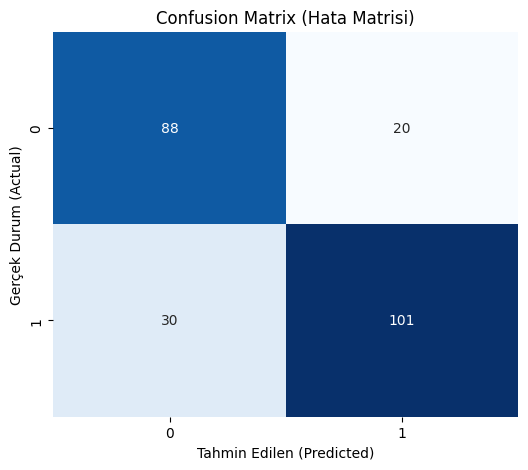


Sınıflandırma Raporu:

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       108
           1       0.83      0.77      0.80       131

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt # plt modülünü tekrar garantiye alalım

# 1. Modeli Tanımla
# n_estimators=100: 100 tane karar ağacı olsun
# random_state=42: Her seferinde aynı sonucu versin
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Modeli Eğit (Fit) -> Ders Çalışma Aşaması
# Sadece X_train ve y_train veriyoruz. X_test'i asla görmüyor!
print("Model eğitiliyor...")
rf_model.fit(X_train, y_train)

# 3. Tahmin Yap (Predict) -> Sınav Aşaması
# Eğitilmiş modele X_test veriyoruz, bakalım y_test'i (cevap anahtarını) tutturabilecek mi?
y_pred = rf_model.predict(X_test)

# 4. Başarıyı Ölç (Evaluation)
acc = accuracy_score(y_test, y_pred)
print(f"\nModel Başarısı (Accuracy): %{acc * 100:.2f}")

# 5. Detaylı Rapor (Confusion Matrix)
# Sadece % kaç bildiği yetmez, nerede hata yaptığını da görmeliyiz.
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Hata Matrisi)")
plt.xlabel("Tahmin Edilen (Predicted)")
plt.ylabel("Gerçek Durum (Actual)")
plt.show()

# Sınıflandırma Raporu
print("\nSınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred))

C:\Users\yigit\AppData\Local\Temp\ipykernel_21776\1069110653.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Önem', y='Özellik', data=feature_importance_df, palette='magma')


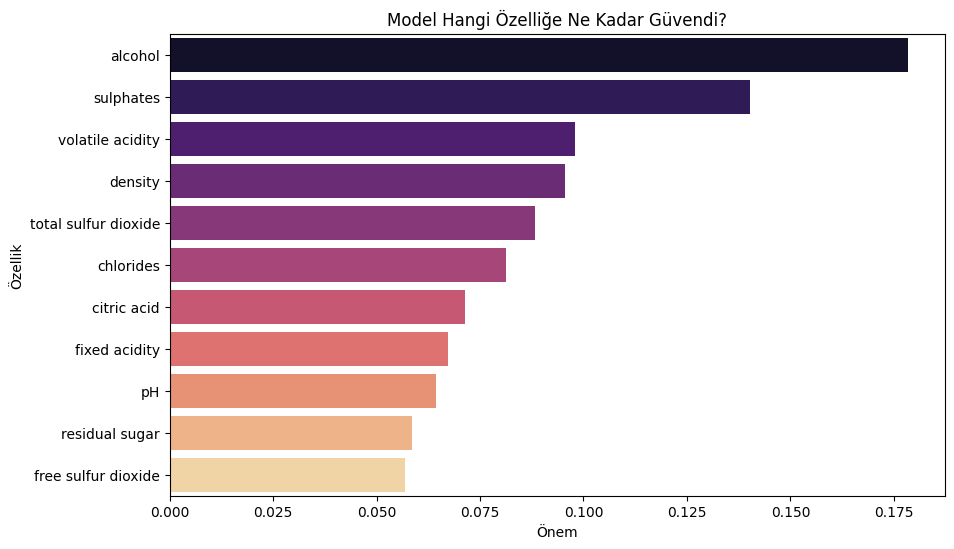

In [13]:
# Modelin hangi özelliklere ne kadar önem verdiğini görselleştirelim
importance = rf_model.feature_importances_
feature_names = X.columns

# Veriyi bir DataFrame'e koyalım ki kolayca çizdirelim
feature_importance_df = pd.DataFrame({'Özellik': feature_names, 'Önem': importance})
feature_importance_df = feature_importance_df.sort_values(ascending=False, by='Önem')

plt.figure(figsize=(10, 6))
sns.barplot(x='Önem', y='Özellik', data=feature_importance_df, palette='magma')
plt.title("Model Hangi Özelliğe Ne Kadar Güvendi?")
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV

# 1. Denenecek parametreleri bir sözlük yapısında tanımlayalım
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# 2. GridSearchCV oluştur (cv=5: Veriyi 5 farklı şekilde bölüp test eder - Cross Validation)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# 3. En iyi parametreleri bulmak için eğit
print("En iyi ayarlar aranıyor (bu işlem biraz sürebilir)...")
grid_search.fit(X_train_scaled, y_train)

# 4. En iyi sonucu ve parametreleri yazdır
print("\nEn İyi Parametreler:", grid_search.best_params_)
print(f"En İyi Eğitim Skoru: %{grid_search.best_score_ * 100:.2f}")

# 5. Yeni modelle test verisi üzerinde tekrar tahmin yap
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print(f"Yeni Test Başarısı (Accuracy): %{accuracy_score(y_test, y_pred_best) * 100:.2f}")

En iyi ayarlar aranıyor (bu işlem biraz sürebilir)...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

En İyi Parametreler: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
En İyi Eğitim Skoru: %80.00
Yeni Test Başarısı (Accuracy): %81.59


In [15]:
# 1. En önemli 7 özelliği seçelim (Feature Importance listenden en üsttekiler)
# Önceki feature_importance_df'den en iyi 7'yi alıyoruz
top_features = feature_importance_df['Özellik'].head(7).values
print(f"Seçilen Odak Özellikler: {top_features}")

# 2. Veriyi sadece bu özelliklerle kısıtlayalım
X_train_focused = pd.DataFrame(X_train_scaled, columns=X.columns)[top_features]
X_test_focused = pd.DataFrame(X_test_scaled, columns=X.columns)[top_features]

# 3. En iyi parametrelerle (GridSearch'ten gelen) modeli tekrar eğitelim
final_model = RandomForestClassifier(
    criterion='entropy', 
    max_depth=20, 
    min_samples_split=2, 
    n_estimators=200, 
    random_state=42
)

final_model.fit(X_train_focused, y_train)
y_pred_final = final_model.predict(X_test_focused)

# 4. Sonuç
final_acc = accuracy_score(y_test, y_pred_final)
print(f"\nOdaklanmış Model Başarısı: %{final_acc * 100:.2f}")

if final_acc > 0.8159:
    print("🚀 Başardık! Gereksiz verileri atınca modelin kafası netleşti ve skor arttı.")
else:
    print("📉 Skor düşebilir veya aynı kalabilir. Bu durumda 'gürültü' sandığımız verilerin aslında az da olsa bir anlamı varmış demektir.")

Seçilen Odak Özellikler: ['alcohol' 'sulphates' 'volatile acidity' 'density' 'total sulfur dioxide'
 'chlorides' 'citric acid']

Odaklanmış Model Başarısı: %81.17
📉 Skor düşebilir veya aynı kalabilir. Bu durumda 'gürültü' sandığımız verilerin aslında az da olsa bir anlamı varmış demektir.


In [16]:
import pandas as pd

def sarap_kalite_tahmin_guncel(veriler):
    # Veriyi, modelin eğitildiği sütun isimleriyle bir DataFrame'e dönüştürüyoruz
    yeni_veri_df = pd.DataFrame([veriler], columns=top_features)
    
    # Tahmin yap
    sonuc = final_model.predict(yeni_veri_df)
    
    return "KALİTELİ (İyi)" if sonuc[0] == 1 else "SIRADAN (Kötü/Orta)"

# Test edelim
# (Örnek veriler: 'alcohol', 'sulphates', 'volatile acidity', 'density', 'total sulfur dioxide', 'chlorides', 'citric acid')
ornek_sarap_degerleri = [12.0, 0.8, 0.3, 0.99, 40, 0.08, 0.4]
print(f"Yeni Şarap Tahmini: {sarap_kalite_tahmin_guncel(ornek_sarap_degerleri)}")

Yeni Şarap Tahmini: KALİTELİ (İyi)


In [1]:
import joblib

# En iyi skoru aldığımız modeli kaydediyoruz
joblib.dump(best_model, 'models/wine_quality_model.pkl')
# Scaler'ı da kaydetmeliyiz çünkü yeni veri gelince aynı şekilde ölçeklenmeli
joblib.dump(scaler, 'models/scaler.pkl')

print("Model ve Scaler başarıyla 'models/' klasörüne kaydedildi!")

NameError: name 'best_model' is not defined